<h1> DESCRIPTION </h1>
This is a deep L-layer neural network designed to identify cats in images. 

<i>In this example L=4 but the number of layers can be easily adjusted by modifying the <code>layers_dims</code> constant to specify the desired number of units per layer</i>

In [14]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

from utils import * # utility functions

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (4.0, 3.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1) # is used to keep all the random function calls consistent

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data() # load_data is from utils module

y = 0. It's a non-cat picture.


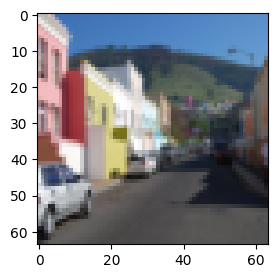

In [4]:
# Example of a picture
index = 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Explore the dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


**Note**:
12288 = 64 x 64 x 3

In [7]:
# ### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] # list containing the input size and each layer size

<b>Note:</b>
The function below implements an L-layer neural network. The activation function for the L−1 hidden layers is ReLU, while the activation function for the final output layer is sigmoid.

In [8]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """   
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = [] # keep track of cost
    
    # Parameters initialization
    parameters = initialize_parameters_deep(layers_dims) 
    
    # Gradient descent
    for i in range(0, num_iterations):

        # Forward propagation:
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost:
        cost = compute_cost(AL, Y)        
    
        # Backward propagation:
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters:
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [11]:
# train the model
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.7717493284237685
Cost after iteration 100: 0.6720534400822918
Cost after iteration 200: 0.6482632048575216
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366113
Cost after iteration 500: 0.5401376634547802
Cost after iteration 600: 0.5279299569455271
Cost after iteration 700: 0.4654773771766849
Cost after iteration 800: 0.36912585249592783
Cost after iteration 900: 0.39174697434805333
Cost after iteration 1000: 0.31518698886006147
Cost after iteration 1100: 0.2726998441789384
Cost after iteration 1200: 0.23741853400268118
Cost after iteration 1300: 0.19960120532208628
Cost after iteration 1400: 0.1892630038846329
Cost after iteration 1500: 0.16118854665827767
Cost after iteration 1600: 0.14821389662363324
Cost after iteration 1700: 0.1377748781297294
Cost after iteration 1800: 0.12974017549190134
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.11382060668633719
Cost after iteration 2100: 0.1078392

In [15]:
# predict training
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [16]:
# predict test
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8
